# nDGP emulator

In [1]:
from nDGPemu import BoostPredictor, test_predict
import numpy as np
import matplotlib.pyplot as plt
from pkg_resources import resource_stream

# set matplotlib style
plt.style.use(resource_stream('nDGPemu','cache/my_style.ini').name)

## Load the emulator

In [2]:
model = BoostPredictor()

Loading model and related data


/Users/fiorini/miniconda3/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/fiorini/miniconda3/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
# check it is working as expected
test_predict(model)

All tests passed successfully.


## Estimate boost factor for example parameters and plot results

In [4]:
# Define parameters
cosmo_params = {'Om':0.32,
                'ns':0.96,
                'As':2.1e-9,
                'h':0.67,
                'Ob':0.048}

H0rc = 1
z = 0.507

# Get boost for training k values
Bk = model.predict(H0rc,z,cosmo_params)
k_vals = model.k_vals

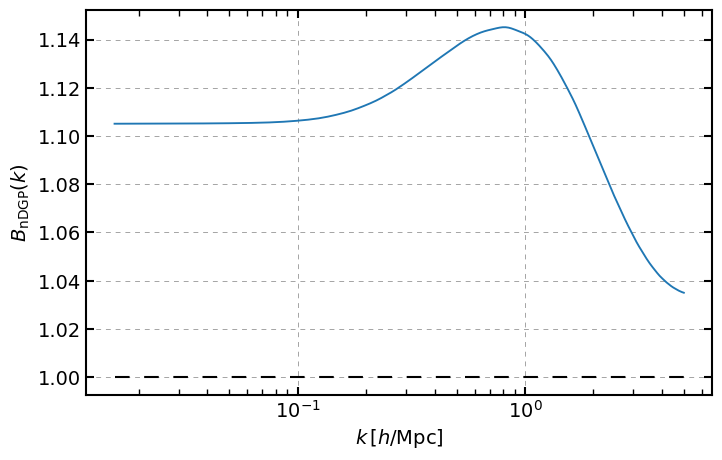

In [5]:
plt.semilogx(k_vals, Bk)
plt.xlabel(r'$k \, [h/{\rm Mpc}]$')
plt.ylabel(r'$B_{\rm nDGP}(k)$')
plt.hlines(1,k_vals.min(),k_vals.max(), 'k','--', lw=1.5);

The emulator can produce predictions for arbitrary values of the wavenumber k in the interpolation range. This is how to do it.

In [6]:

# Get boost for custom k values
k_custom = np.logspace(-1.5, 0.5, 10)
Bk_custom = model.predict(H0rc,z,cosmo_params, k_out=k_custom)

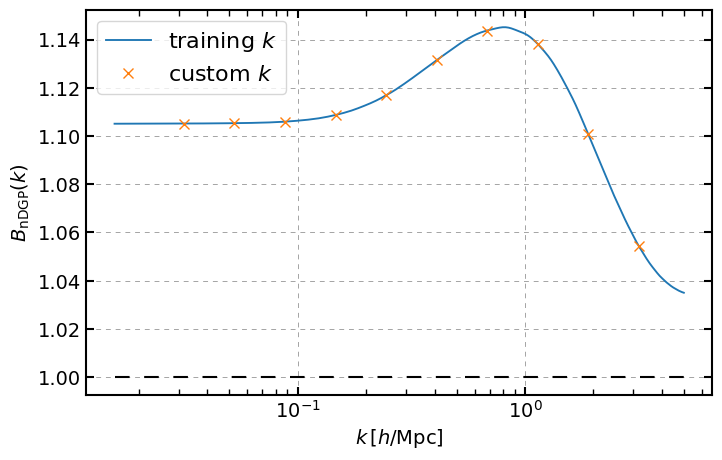

In [7]:
plt.semilogx(k_vals, Bk, label='training $k$')
plt.semilogx(k_custom, Bk_custom, 'x', ms=7, label='custom $k$')
plt.xlabel(r'$k \, [h/{\rm Mpc}]$')
plt.ylabel(r'$B_{\rm nDGP}(k)$')
plt.hlines(1,k_vals.min(),k_vals.max(), 'k','--', lw=1.5);
plt.legend();

The emulator can also extrapolate outside the range for wavenumber k. You can do that using the "ext" argument. Be careful that for $k>k_{\rm max}$ the results are unreliable. For $k<k_{\rm min}$ instead, the extrapolated values should be in good agreement with the linear predictions. 

In [8]:

# Get boost for custom k values
k_ext = np.logspace(-2, 1, 30)
Bk_ext = model.predict(H0rc,z,cosmo_params, k_out=k_ext, ext=0)

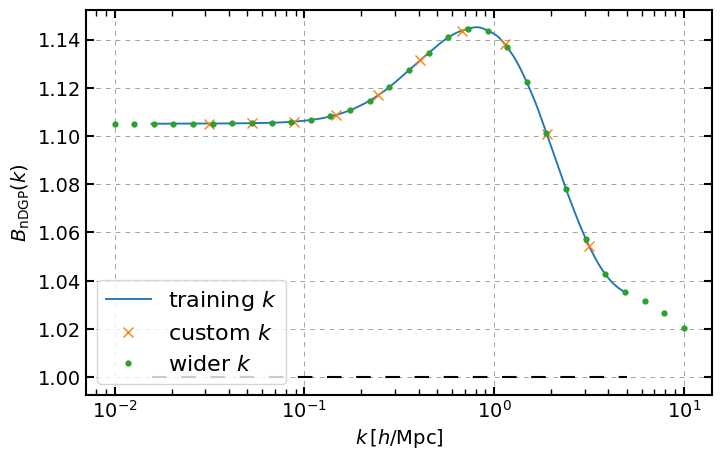

In [9]:
plt.semilogx(k_vals, Bk, label='training $k$')
plt.semilogx(k_custom, Bk_custom, 'x', ms=7, label='custom $k$')
plt.semilogx(k_ext, Bk_ext, '.', ms=7, label='wider $k$')
plt.xlabel(r'$k \, [h/{\rm Mpc}]$')
plt.ylabel(r'$B_{\rm nDGP}(k)$')
plt.hlines(1,k_vals.min(),k_vals.max(), 'k','--', lw=1.5);
plt.legend();